## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#extension = 'csv'

#combine all files in the list
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
combined_csv = pd.merge(study_results, mouse_metadata, on="Mouse ID")
combined_csv

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
count_unique_mice = len(combined_csv["Mouse ID"].unique())
count_unique_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_csv.loc[combined_csv.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice=pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_csv[combined_csv['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
count_unique_mice_clean = len(clean_df["Mouse ID"].unique())
count_unique_mice_clean

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_df = clean_df.groupby("Drug Regimen")
drug = drug_df["Tumor Volume (mm3)"]
drug


In [11]:
#discuss on Monday
#mean_volume = np.mean(drug_df["Tumor Volume (mm3)"])
mean_volume = drug.mean()
mean_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#median_volume = np.median(drug_df["Tumor Volume (mm3)"])
median_volume = drug.median()
median_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
std_dev = drug.std()
var = drug.var()
sem = drug.sem()

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
summary_stats_df = pd.DataFrame({
    "Mean of tumor volume": mean_volume,
    "Median of tumor volume": median_volume,
    "Variance of tumor volume": var,
    "Standard Deviation of tumor volume": std_dev,
    "SEM of tumor volume": sem
})
summary_stats_df

,Mean of tumor volume,Median of tumor volume,Variance of tumor volume,Standard Deviation of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_agg = drug.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:>

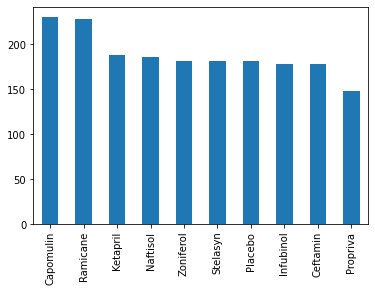

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot.bar()

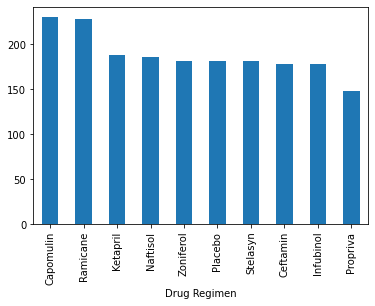

In [17]:
 # Generate a bar plot showing the total number of timepoints for all mice testedfor each drug regimen using pyplot.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count() 
timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

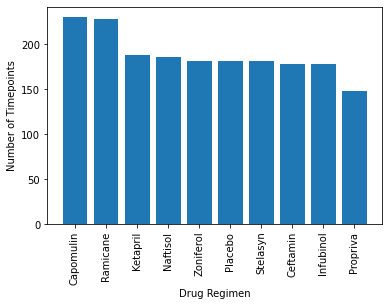

In [18]:
timepoint_desc = timepoint.sort_values(ascending=False) # sorted values
plt.bar(timepoint_desc.index, timepoint_desc.values) # used pyplot function
plt.ylabel('Number of Timepoints', size=10) # define y label
plt.xlabel('Drug Regimen') # define x label
plt.xticks(rotation='vertical') # this is to rotate the x values
plt.show()

<AxesSubplot:ylabel='Sex'>

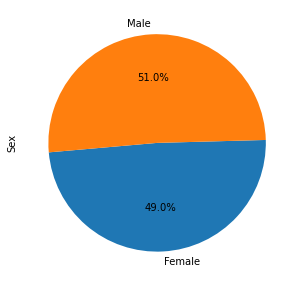

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df.groupby(['Sex'])['Sex'].count()
gender.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

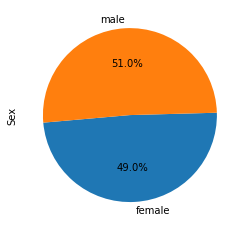

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')  
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tum_vol = clean_df.groupby("Mouse ID") ["Timepoint"].max()
final_tum_vol

final_tum_vol = final_tum_vol.reset_index()
final_tum_vol.head()

#final_timepoint = final_tum_vol[("Timepoint")].max()
#final_timepoint

final_data = pd.merge(clean_df, final_tum_vol, on=["Mouse ID" , "Timepoint"])
final_data

#max time point for each mouse ID

max_time_point = final_data.info()
max_time_point

# Start by getting the last (greatest) timepoint for each mouse

final_data.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.4+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

list_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
list_drug

# Create empty list to fill with tumor vol data (for plotting)

list_tumor = []
for x in list_drug:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    locate_mice_cap = final_data.loc[final_data["Drug Regimen"]== x, "Tumor Volume (mm3)"]
    #indented, run IQR function here, printing out remember x is the drug name
    list_tumor.append(locate_mice_cap)
list_tumor

    # add subset 
   

[0      38.982878
 224    38.753265
 225    32.377357
 226    23.343598
 227    38.939633
 228    28.484033
 229    41.483008
 230    40.728578
 231    46.539206
 232    31.023923
 233    38.125164
 234    40.658124
 235    36.041047
 236    37.311846
 237    41.581521
 238    31.896238
 239    40.159220
 240    37.074024
 241    38.846876
 242    39.952347
 243    34.455298
 244    47.685963
 245    33.329098
 246    30.485985
 247    28.430964
 Name: Tumor Volume (mm3), dtype: float64,
 58     38.342008
 59     36.561652
 60     31.560470
 61     38.407618
 62     43.047543
 63     37.311236
 64     36.134852
 65     44.183451
 66     22.050126
 67     33.397653
 69     37.225650
 70     32.978522
 71     33.562402
 72     29.128472
 73     38.810366
 74     40.667713
 75     30.564625
 76     43.166373
 77     31.095335
 78     30.276232
 79     40.659006
 80     30.638696
 81     43.419381
 110    45.220869
 222    36.374510
 Name: Tumor Volume (mm3), dtype: float64,
 29     36.321

In [49]:
#tumors = final_data["Tumor Volume (mm3)"]

tum_vol_list = []

list_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
for x in list_drug:
    
    tum_vol= final_data.loc[final_data["Drug Regimen"]== x, "Tumor Volume (mm3)"]

    tum_vol_list.append(tum_vol)

    quartiles = tum_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq  
    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    print(lower_bound)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x} potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

#print(f"{list_drug}'s potential outliers: {outliers}")

20.70456164999999
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
17.912664470000003
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
36.83290494999999
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
25.355449580000002
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


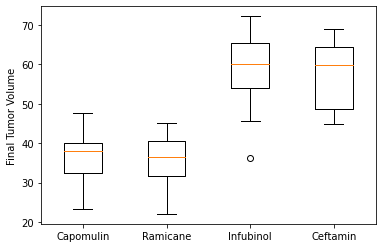

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#box_plot = plt.subplots()
#unable to do this one - I guess I got the code wrong
#plt.show()

x_label = ["Capomulin","Ramicane","Infubinol","Ceftamin"] 
plt.boxplot(list_tumor, labels = x_label)
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

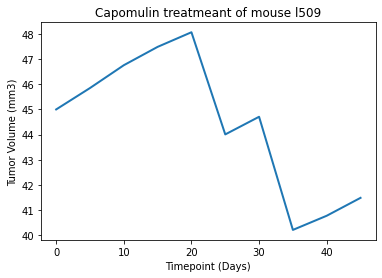

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
forline_df.head()

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

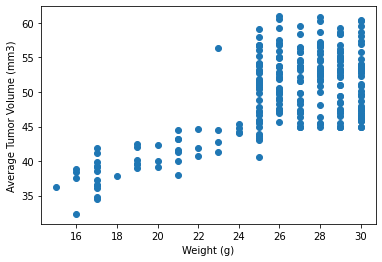

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capavg = clean_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.66


In [28]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=1.0967892333689662, intercept=21.010261028552836, rvalue=0.6595577594236609, pvalue=2.4262616144119585e-32, stderr=0.07969309565061977, intercept_stderr=2.1020889056364602)

In [29]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

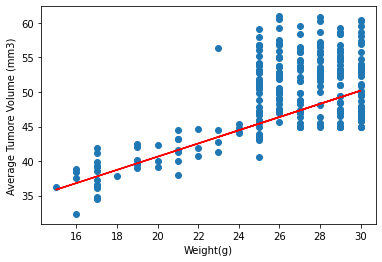

In [30]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()